## Surprise Housing- House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [524]:
# reading the dataset
house = pd.read_csv("train.csv")

In [525]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [526]:
#checking for null entries
print((house.isnull().sum() > 0).sum())

19


In [527]:
#checking for columns which has more than 85% of data being NULL
for i in house.columns:
    null_perc = round(100*(house[i].isnull().sum()/len(house.index)), 2)
    if null_perc > 80:
        print(i,null_perc)

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


In [528]:
house['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [529]:
house['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [530]:
house['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [531]:
house['Fence'].value_counts() 

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [532]:
house_cat = house.select_dtypes(include=['object'])
for i in house_cat:
    print(i,house[i].nunique())

MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6


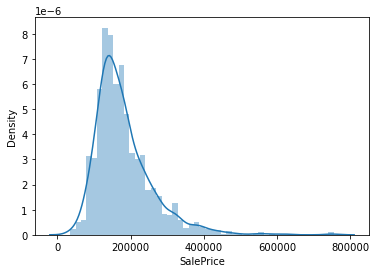

In [533]:
# target variable: sale price of house
sns.distplot(house['SalePrice'])
plt.show()

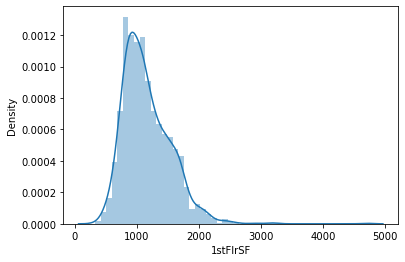

In [534]:
sns.distplot(house['1stFlrSF'])
plt.show()

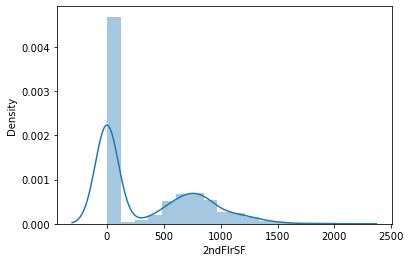

In [535]:
sns.distplot(house['2ndFlrSF'])
plt.show()

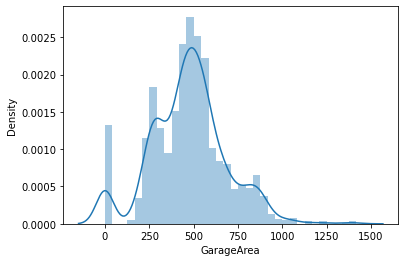

In [536]:
sns.distplot(house['GarageArea'])
plt.show()

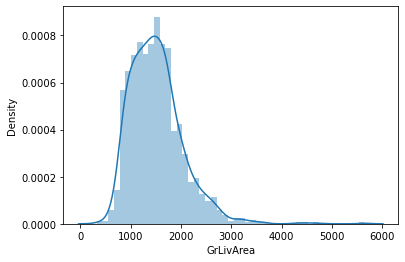

In [537]:
sns.distplot(house['GrLivArea'])
plt.show()

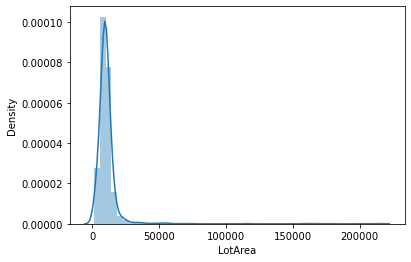

In [538]:
sns.distplot(house['LotArea'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [539]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [540]:
house['PoolArea'].value_counts() 

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [541]:
house = house.drop(['Id','MoSold','YrSold'], axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000


In [542]:
# dropping ID, MoSold, YrSold as ID not needed and month and year when house was sold will not be available for new houses.
house_numeric = house_numeric.drop(['Id','MoSold','YrSold'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,836,192,84,0,0,0,0,0,250000


In [543]:
house_cat = house_numeric.select_dtypes(include=['float64', 'int64'])
for i in house_cat:
    print(i,house[i].nunique())

MSSubClass 15
LotFrontage 110
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageYrBlt 97
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
SalePrice 663


In [544]:
house['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [545]:
# dropping all the numeric variables which are actually categorical. These variables needs to be convereted to needed dummies
house_numeric = house_numeric.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd'], axis=1)
house_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000


               LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.426095    0.193458    0.233633    0.049900   
LotArea           0.426095  1.000000    0.104160    0.214103    0.111170   
MasVnrArea        0.193458  0.104160    1.000000    0.264736   -0.072319   
BsmtFinSF1        0.233633  0.214103    0.264736    1.000000   -0.050117   
BsmtFinSF2        0.049900  0.111170   -0.072319   -0.050117    1.000000   
BsmtUnfSF         0.132644 -0.002618    0.114442   -0.495251   -0.209294   
TotalBsmtSF       0.392075  0.260833    0.363936    0.522396    0.104810   
1stFlrSF          0.457181  0.299475    0.344501    0.445863    0.097117   
2ndFlrSF          0.080177  0.050986    0.174561   -0.137079   -0.099260   
LowQualFinSF      0.038469  0.004779   -0.069071   -0.064503    0.014807   
GrLivArea         0.402797  0.263116    0.390857    0.208171   -0.009640   
BsmtFullBath      0.100949  0.158155    0.085310    0.649212    0.158678   
BsmtHalfBath

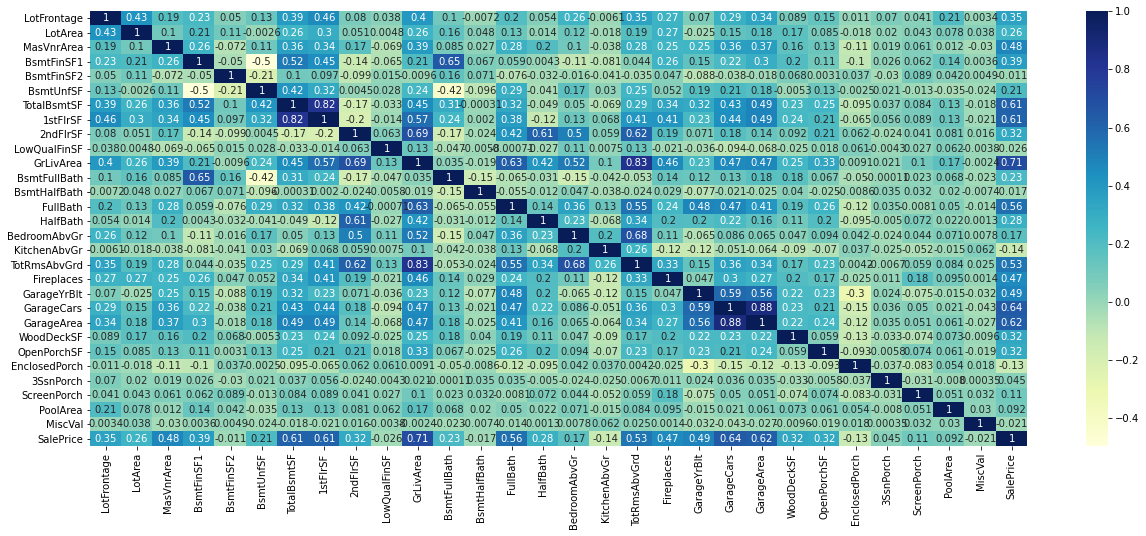

In [546]:
corr= house_numeric.corr()
print(corr)
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(21,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- Price is highly (positively) correlated with GrlivArea, TotalBsmtSF, 1stFlrSF,GarageCars,GarageArea. these variables defines the luxury of the house due to which, when thse indendependent variables increases, saleprice tends to be increase.


Correlation among independent variables:
- Many independent variables are highly correlated : Garagecars and garageArea , totalbsnmtSF and  1stFlrSF etc..


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are some missing values like LotFrontage,GarageQual etc. We've also seen that variables needs to be converted to categorical variables (so that dummy variable are created for the categories).



In [547]:
for i in house.columns:
    null_perc = round(100*(house[i].isnull().sum()/len(house.index)), 2)
    if null_perc > 0 and null_perc < 80:
        print(i,null_perc)

LotFrontage 17.74
MasVnrType 0.55
MasVnrArea 0.55
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.07
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55


In [548]:
house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [549]:
fill_na_vars = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [550]:
for i in fill_na_vars:
    house[i].fillna('NA',inplace=True)

In [551]:
for i in house.columns:
    null_perc = round(100*(house[i].isnull().sum()/len(house.index)), 2)
    if null_perc > 0 and null_perc < 80:
        print(i,null_perc)

LotFrontage 17.74
MasVnrArea 0.55


In [552]:
house['LotFrontage'].fillna(0,inplace=True)

In [553]:
house['MasVnrArea'].fillna(0,inplace=True)

In [554]:
for i in house.columns:
    null_perc = round(100*(house[i].isnull().sum()/len(house.index)), 2)
    if null_perc > 80:
        print(i,null_perc)

Alley 93.77
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


In [555]:
# variables having more than 90% of 
# NULL records can be dropped as most of the records will not have value and cannot be used for analysis

In [556]:
house = house.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,0,0,WD,Normal,250000


In [557]:
house_numeric['LotFrontage'] = house['LotFrontage']

In [558]:
house_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,34.664304,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,42.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,63.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [559]:
#creating categorical variable in the form of ranges for 'YearBuilt','YearRemodAdd' variables

In [560]:
house['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [561]:
# binning Yearbuilt 
def yearbuilt(n):
    if n < 1954:
        return 'upto_1954'
    elif n >=1954 and n < 1973:
        return '1954_to_1973'
    elif n >= 1973 and n < 2000:
        return '1973_to_2000'
    else:
        return 'from_2000'
        
house['YearBuilt'] = house['YearBuilt'].apply(lambda x: yearbuilt(x))
house['YearRemodAdd'] = house['YearRemodAdd'].apply(lambda x: yearbuilt(x))

In [562]:
house['YearBuilt'].value_counts()

from_2000       388
1954_to_1973    368
upto_1954       361
1973_to_2000    343
Name: YearBuilt, dtype: int64

In [563]:
house['YearRemodAdd'].value_counts()

from_2000       552
1973_to_2000    437
1954_to_1973    274
upto_1954       197
Name: YearRemodAdd, dtype: int64

In [564]:
house['GarageYrBlt'].describe()

count     1460
unique      98
top         NA
freq        81
Name: GarageYrBlt, dtype: object

In [565]:

# binning Yearbuilt 
def yearbuilt1(n):
    if n == 'NA':
        return 'NA'
    elif n < 1954:
        return 'upto_1954'
    elif n >=1954 and n < 1973:
        return '1954_to_1973'
    elif n >= 1973 and n < 2000:
        return '1973_to_2000'
    else:
        return 'from_2000'
        
house['GarageYrBlt'] = house['GarageYrBlt'].apply(lambda x: yearbuilt1(x))

In [566]:
house['GarageYrBlt'].value_counts()

1973_to_2000    430
from_2000       402
1954_to_1973    338
upto_1954       209
NA               81
Name: GarageYrBlt, dtype: int64

In [567]:
#creating the categorical variable list 

In [568]:
house_cat = house.select_dtypes(include=['object'])
house_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NA,Attchd,from_2000,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,1973_to_2000,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,from_2000,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,1973_to_2000,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,from_2000,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,1973_to_2000,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,1973_to_2000,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,upto_1954,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,NA,Attchd,upto_1954,Unf,TA,TA,Y,WD,Normal


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [569]:
# split into X and y
y = house.pop('SalePrice') # response variable in Y
X = house 

In [570]:
missing_cat_cols =house[['MSSubClass','OverallQual','OverallCond']]

In [571]:
house_cat = pd.concat([house_cat,missing_cat_cols], axis=1)
house_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,from_2000,RFn,TA,TA,Y,WD,Normal,60,7,5
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1973_to_2000,RFn,TA,TA,Y,WD,Normal,20,6,8
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,from_2000,RFn,TA,TA,Y,WD,Normal,60,7,5
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1973_to_2000,Unf,TA,TA,Y,WD,Abnorml,70,7,5
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,from_2000,RFn,TA,TA,Y,WD,Normal,60,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1973_to_2000,RFn,TA,TA,Y,WD,Normal,60,6,5
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,1973_to_2000,Unf,TA,TA,Y,WD,Normal,20,6,6
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,upto_1954,RFn,TA,TA,Y,WD,Normal,70,7,9
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,upto_1954,Unf,TA,TA,Y,WD,Normal,20,5,6


In [572]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_cat.astype(str), drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [573]:
# drop categorical variables 
X = X.drop(list(house_cat.columns), axis=1)

In [574]:
X.shape

(1460, 28)

In [575]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [576]:
X.shape

(1460, 281)

In [577]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object', length=281)

In [578]:
for i in X:
    print(i)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neig

In [579]:
for i in X:
    print(X[i].describe())

count    1.460000e+03
mean     1.028857e-16
std      1.000343e+00
min     -1.662893e+00
25%     -4.508569e-01
50%      1.551612e-01
75%      6.168893e-01
max      7.369662e+00
Name: LotFrontage, dtype: float64
count    1.460000e+03
mean    -4.202783e-17
std      1.000343e+00
min     -9.237292e-01
25%     -2.969908e-01
50%     -1.040633e-01
75%      1.087080e-01
max      2.051827e+01
Name: LotArea, dtype: float64
count    1.460000e+03
mean    -3.939010e-17
std      1.000343e+00
min     -5.707501e-01
25%     -5.707501e-01
50%     -5.707501e-01
75%      3.383686e-01
max      8.285201e+00
Name: MasVnrArea, dtype: float64
count    1.460000e+03
mean     1.505645e-17
std      1.000343e+00
min     -9.730182e-01
25%     -9.730182e-01
50%     -1.319022e-01
75%      5.891327e-01
max      1.140575e+01
Name: BsmtFinSF1, dtype: float64
count    1.460000e+03
mean     1.653168e-16
std      1.000343e+00
min     -2.886528e-01
25%     -2.886528e-01
50%     -2.886528e-01
75%     -2.886528e-01
max      8.8

count    1.460000e+03
mean    -1.694041e-16
std      1.000343e+00
min     -9.478452e-02
25%     -9.478452e-02
50%     -9.478452e-02
75%     -9.478452e-02
max      1.055025e+01
Name: LandSlope_Sev, dtype: float64
count    1.460000e+03
mean    -1.041785e-17
std      1.000343e+00
min     -3.703704e-02
25%     -3.703704e-02
50%     -3.703704e-02
75%     -3.703704e-02
max      2.700000e+01
Name: Neighborhood_Blueste, dtype: float64
count    1.460000e+03
mean     1.726739e-16
std      1.000343e+00
min     -1.052632e-01
25%     -1.052632e-01
50%     -1.052632e-01
75%     -1.052632e-01
max      9.500000e+00
Name: Neighborhood_BrDale, dtype: float64
count    1.460000e+03
mean     2.194211e-16
std      1.000343e+00
min     -2.033949e-01
25%     -2.033949e-01
50%     -2.033949e-01
75%     -2.033949e-01
max      4.916545e+00
Name: Neighborhood_BrkSide, dtype: float64
count    1.460000e+03
mean     2.124252e-16
std      1.000343e+00
min     -1.398323e-01
25%     -1.398323e-01
50%     -1.398323e-01


count    1.460000e+03
mean    -3.674002e-16
std      1.000343e+00
min     -2.158587e-01
25%     -2.158587e-01
50%     -2.158587e-01
75%     -2.158587e-01
max      4.632660e+00
Name: HouseStyle_SLvl, dtype: float64
count    1.460000e+03
mean     2.576326e-16
std      1.000343e+00
min     -5.541412e-01
25%     -5.541412e-01
50%     -5.541412e-01
75%     -5.541412e-01
max      1.804594e+00
Name: YearBuilt_1973_to_2000, dtype: float64
count    1.460000e+03
mean     2.920039e-17
std      1.000343e+00
min     -6.016147e-01
25%     -6.016147e-01
50%     -6.016147e-01
75%      1.662193e+00
max      1.662193e+00
Name: YearBuilt_from_2000, dtype: float64
count    1.460000e+03
mean    -6.995926e-18
std      1.000343e+00
min     -5.731321e-01
25%     -5.731321e-01
50%     -5.731321e-01
75%     -5.731321e-01
max      1.744798e+00
Name: YearBuilt_upto_1954, dtype: float64
count    1.460000e+03
mean    -1.911713e-16
std      1.000343e+00
min     -6.535862e-01
25%     -6.535862e-01
50%     -6.535862e-

count    1.460000e+03
mean     9.569970e-17
std      1.000343e+00
min     -6.423821e-02
25%     -6.423821e-02
50%     -6.423821e-02
75%     -6.423821e-02
max      1.556706e+01
Name: Foundation_Stone, dtype: float64
count    1.460000e+03
mean     4.595544e-16
std      1.000343e+00
min     -4.537649e-02
25%     -4.537649e-02
50%     -4.537649e-02
75%     -4.537649e-02
max      2.203785e+01
Name: Foundation_Wood, dtype: float64
count    1.460000e+03
mean    -8.345683e-17
std      1.000343e+00
min     -1.567208e-01
25%     -1.567208e-01
50%     -1.567208e-01
75%     -1.567208e-01
max      6.380775e+00
Name: BsmtQual_Fa, dtype: float64
count    1.460000e+03
mean     5.103984e-16
std      1.000343e+00
min     -8.567186e-01
25%     -8.567186e-01
50%     -8.567186e-01
75%      1.167244e+00
max      1.167244e+00
Name: BsmtQual_Gd, dtype: float64
count    1.460000e+03
mean    -6.414199e-17
std      1.000343e+00
min     -1.612495e-01
25%     -1.612495e-01
50%     -1.612495e-01
75%     -1.612495e-

count    1.460000e+03
mean     5.779243e-18
std      1.000343e+00
min     -2.532586e-01
25%     -2.532586e-01
50%     -2.532586e-01
75%     -2.532586e-01
max      3.948533e+00
Name: GarageType_BuiltIn, dtype: float64
count    1.460000e+03
mean     1.810006e-16
std      1.000343e+00
min     -7.875671e-02
25%     -7.875671e-02
50%     -7.875671e-02
75%     -7.875671e-02
max      1.269733e+01
Name: GarageType_CarPort, dtype: float64
count    1.460000e+03
mean     1.178661e-16
std      1.000343e+00
min     -6.005589e-01
25%     -6.005589e-01
50%     -6.005589e-01
75%      1.665116e+00
max      1.665116e+00
Name: GarageType_Detchd, dtype: float64
count    1.460000e+03
mean     2.045548e-17
std      1.000343e+00
min     -2.423597e-01
25%     -2.423597e-01
50%     -2.423597e-01
75%     -2.423597e-01
max      4.126099e+00
Name: GarageType_NA, dtype: float64
count    1.460000e+03
mean     1.761148e-16
std      1.000343e+00
min     -6.461236e-01
25%     -6.461236e-01
50%     -6.461236e-01
75%   

count    1.460000e+03
mean     6.680349e-17
std      1.000343e+00
min     -2.015620e-01
25%     -2.015620e-01
50%     -2.015620e-01
75%     -2.015620e-01
max      4.961253e+00
Name: OverallCond_4, dtype: float64
count    1.460000e+03
mean     2.646285e-17
std      1.000343e+00
min     -1.133499e+00
25%     -1.133499e+00
50%      8.822240e-01
75%      8.822240e-01
max      8.822240e-01
Name: OverallCond_5, dtype: float64
count    1.460000e+03
mean    -1.800690e-16
std      1.000343e+00
min     -4.567376e-01
25%     -4.567376e-01
50%     -4.567376e-01
75%     -4.567376e-01
max      2.189441e+00
Name: OverallCond_6, dtype: float64
count    1.460000e+03
mean    -1.618188e-16
std      1.000343e+00
min     -4.041616e-01
25%     -4.041616e-01
50%     -4.041616e-01
75%     -4.041616e-01
max      2.474258e+00
Name: OverallCond_7, dtype: float64
count    1.460000e+03
mean     1.401466e-16
std      1.000343e+00
min     -2.277569e-01
25%     -2.277569e-01
50%     -2.277569e-01
75%     -2.277569e-0

In [580]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

Let's now predict prices, a dataset using linear regression.

In [581]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [582]:
#np.isfinite(X).all()

In [583]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-72784662248996.72
[ 9.00944797e+02  6.40970579e+03  2.94558663e+03  1.10282183e+16
  3.90061740e+15  1.06841167e+16 -1.06076701e+16  7.20744911e+15
  8.13853151e+15  9.06517073e+14 -9.79693029e+15  8.65750000e+02
  7.53750000e+01  1.66900000e+03 -9.15500000e+02 -1.51550000e+03
 -4.41018750e+03 -1.64175000e+03  1.58975000e+03  2.70221875e+03
  2.79925000e+03  5.56250000e+02  1.68546875e+03  4.20000000e+01
  1.26362500e+03  1.22500000e+03  3.85137500e+03  7.18750000e+02
  8.15000000e+03  4.79512500e+03  1.72374375e+04  1.39991250e+04
  1.12893750e+03  5.97000000e+02  7.19750000e+02  4.45000000e+01
 -4.50500000e+02 -1.09200000e+03  1.05800000e+03 -4.43500000e+02
  1.66900000e+03 -1.38356250e+03  4.65921875e+02 -4.31500000e+02
  7.21000000e+02 -2.55150000e+03  3.56968750e+02  3.92125000e+02
  4.86000000e+02 -1.75000000e+02 -1.82500000e+02  4.29725000e+03
 -2.33325000e+03  5.45500000e+02  3.76125000e+02 -2.14343750e+03
 -1.62396875e+03 -2.02362500e+03  6.02812500e+02 -1.54962500e+03
  3.60

In [584]:
from sklearn.metrics import r2_score, mean_squared_error

In [585]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train_lr:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test_lr:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr: 0.9559656281564001
r2_test_lr: -1.2266813835229731e+22
rss_train_lr: 280970063558.1846
rss_test_lr: 3.4576621864836706e+34
mse_train_lr: 275191051.47716415
mse_test_lr: 7.89420590521386e+31


In [586]:
#clearly overfitting as we can observe in r2 test and also rss for test is very high

### Ridge and Lasso Regression


Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [587]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [588]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 400}


In [589]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 400
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.59558994e+00  2.88406778e+03  3.30628067e+03  2.05286090e+03
  9.27634293e+02  7.71053987e+02  3.25196533e+03  5.29954999e+03
  5.26985513e+03 -5.23155036e+02  8.22817633e+03  2.45947145e+03
  2.45762645e+02  4.47103792e+03  2.05807622e+03  5.42223729e+02
 -2.02820823e+03  3.89901723e+03  2.59073523e+03  4.70920684e+03
  2.93216662e+03  1.45241736e+03  9.51878983e+02  9.59479645e+01
  1.22298027e+03  1.31831106e+03 -3.16010959e+02  1.85639455e+02
  8.34952758e+02  3.82748775e+02  1.24152125e+03 -6.90630146e+02
  7.24195564e+02  5.34245413e+02 -2.10549363e+03 -3.50979842e+02
  1.08370017e+03  6.14407868e+02  1.85104261e+03 -9.85925678e+02
  2.04056994e+03 -1.21385228e+03 -2.96943609e+02 -5.32667942e+02
  7.35406431e+02  2.37596395e+02 -1.33609724e+02 -1.08437356e+02
  2.03982556e+02  5.89746229e+02 -7.92703642e+02  3.22600022e+03
 -3.22603082e+03 -9.91867684e+02 -9.16938297e+02 -1.52669147e+03
 -1.53525636e+03 -1.69589942e+03  1.39002209e+01 -5.67851688e+02
  5.99613236e+03  4.54872

In [590]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [591]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train_lr:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test_lr:",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr: 0.8987956577054865
r2_test_lr: 0.8621085530474578
rss_train_lr: 645754425380.4685
rss_test_lr: 388676349353.267
mse_train_lr: 632472502.8212228
mse_test_lr: 887388925.46408


In [592]:
# Now we can see that r2 at test is quite reliable as compared to previous r2 and also rss is reduced comparatevily

## Lasso

In [593]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [594]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 300}


In [600]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =300

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=300)

In [601]:
lasso.coef_

array([ 0.00000000e+00,  3.86420894e+03,  2.01898541e+03,  4.37105991e+03,
        5.54833225e+02, -0.00000000e+00,  6.59681203e+03,  0.00000000e+00,
        3.20282241e+03, -2.03651445e+03,  2.88087475e+04,  2.26637301e+03,
        0.00000000e+00,  2.78268866e+03,  0.00000000e+00, -1.49715645e+03,
       -4.99310737e+03, -0.00000000e+00,  9.18565101e+02,  5.37159522e+03,
        0.00000000e+00,  3.22321959e+02,  7.02402076e+02, -0.00000000e+00,
        1.03654634e+03,  9.79144162e+02,  3.43249999e+02,  2.70902613e+00,
        0.00000000e+00,  2.84293156e+02,  1.51801149e+03, -0.00000000e+00,
        7.93780905e+02,  3.66931800e+02, -2.57793594e+02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.33264861e+03, -6.46127556e+02,
        1.77909788e+03, -9.27643986e+02,  0.00000000e+00, -0.00000000e+00,
        1.51848695e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.83843563e+02,  7.24499246e+01,  3.99281101e+03,
       -2.86137656e+03,  

In [602]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [603]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train_lr:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test_lr:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr: 0.9435633798486435
r2_test_lr: 0.8430243437160778
rss_train_lr: 360105074446.3039
rss_test_lr: 442469249327.45636
mse_train_lr: 352698407.8808069
mse_test_lr: 1010203765.5877999


In [604]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.559656e-01,8.987957e-01,9.435634e-01
1,R2 Score (Test),-1.226681e+22,8.621086e-01,8.430243e-01
2,RSS (Train),2.809701e+11,6.457544e+11,3.601051e+11
3,RSS (Test),3.457662e+34,3.886763e+11,4.424692e+11
4,MSE (Train),1.658888e+04,2.514901e+04,1.878027e+04
5,MSE (Test),8.884934e+15,2.978907e+04,3.178370e+04


## the changes in the coefficients after regularization

In [605]:
betas = pd.DataFrame(index=X.columns)

In [606]:
betas.rows = X.columns

In [607]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [611]:
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotFrontage,9.009448e+02,6.595590,0.000000
LotArea,6.409706e+03,2884.067783,3864.208945
MasVnrArea,2.945587e+03,3306.280669,2018.985412
BsmtFinSF1,1.102822e+16,2052.860904,4371.059914
BsmtFinSF2,3.900617e+15,927.634293,554.833225
BsmtUnfSF,1.068412e+16,771.053987,-0.000000
TotalBsmtSF,-1.060767e+16,3251.965333,6596.812031
1stFlrSF,7.207449e+15,5299.549990,0.000000
2ndFlrSF,8.138532e+15,5269.855130,3202.822410
LowQualFinSF,9.065171e+14,-523.155036,-2036.514446


In [622]:
betas['Lasso'].sort_values(ascending=False)

RoofMatl_CompShg             5.747042e+04
RoofMatl_Tar&Grv             3.690913e+04
RoofMatl_WdShngl             3.162959e+04
GrLivArea                    2.880875e+04
RoofMatl_WdShake             2.424510e+04
OverallQual_10               1.259055e+04
RoofMatl_Membran             1.200591e+04
OverallQual_9                1.172173e+04
RoofMatl_Metal               1.142246e+04
RoofMatl_Roll                1.122430e+04
OverallQual_8                9.357789e+03
TotalBsmtSF                  6.596812e+03
SaleType_New                 5.756740e+03
GarageCars                   5.371595e+03
Neighborhood_NoRidge         4.827507e+03
BsmtFinSF1                   4.371060e+03
BsmtExposure_Gd              4.053729e+03
Neighborhood_Crawfor         3.992811e+03
LotArea                      3.864209e+03
Functional_Typ               3.411740e+03
Neighborhood_Somerst         3.241823e+03
Neighborhood_NridgHt         3.218834e+03
OverallQual_7                3.212860e+03
2ndFlrSF                     3.202

## Interpretation from the Lasso Model

1. The Lasso Model explains that, when the house is having below Roof material,the Saleprice is expected to grow:    


    CompShg	Standard (Composite) Shingle
    Tar&Grv	Gravel & Tar
    WdShake	Wood Shakes
    WdShngl	Wood Shingles
    
    
2. Also *GrLivArea* - Above grade (ground) living area square fee is propotinal to increase in Salesprice

3. And offcourse when the *OverallQual* overall material and finish of the house used is "very excellent", the saleprice can be higher.


4. The model also says that when the house is location in *Condition2_PosN*- Near positive off-site feature--park, greenbelt, etc, saleprice is expected to reduce.

5. When the height of basement and kitchen built quality is TYPICAL/AVERAGE , the Salesprice is expected to reduce

In [624]:
#further checking on multicollinearity

### VIF calculation
# Create a df that will contain the names of all the features and thier respect VIS values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
280,OverallCond_9,inf
263,MSSubClass_90,inf
249,SaleCondition_Partial,inf
242,SaleType_New,inf
234,GarageCond_TA,inf
233,GarageCond_Po,inf
232,GarageCond_NA,inf
231,GarageCond_Gd,inf
230,GarageCond_Fa,inf
229,GarageQual_TA,inf


### Build model using RFE

In [627]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [634]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train,y_train)

LinearRegression()

In [651]:
#RFE with 15 features - R2 -> .179 
#RFE with 25 features - R2 -> .32
#RFE with 55 features

rfe1 = RFE(lm_rfe, n_features_to_select=55)

rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=55)

In [652]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('LotFrontage', False, 71),
 ('LotArea', False, 18),
 ('MasVnrArea', False, 42),
 ('BsmtFinSF1', False, 8),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 139),
 ('BsmtHalfBath', False, 219),
 ('FullBath', False, 51),
 ('HalfBath', False, 152),
 ('BedroomAbvGr', False, 40),
 ('KitchenAbvGr', False, 13),
 ('TotRmsAbvGrd', False, 92),
 ('Fireplaces', False, 65),
 ('GarageCars', False, 12),
 ('GarageArea', False, 55),
 ('WoodDeckSF', False, 166),
 ('OpenPorchSF', False, 83),
 ('EnclosedPorch', False, 225),
 ('3SsnPorch', False, 108),
 ('ScreenPorch', False, 127),
 ('PoolArea', False, 38),
 ('MiscVal', False, 148),
 ('MSZoning_FV', False, 30),
 ('MSZoning_RH', False, 33),
 ('MSZoning_RL', False, 31),
 ('MSZoning_RM', False, 32),
 ('Street_Pave', False, 101),
 ('LotShape_IR2', False, 155),
 ('LotShape_IR3', False, 150),
 ('LotShape

In [653]:
X_train.columns[rfe1.support_]

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BldgType_2fmCon', 'BldgType_Duplex', 'RoofMatl_CompShg',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'ExterCond_Po', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtCond_Po',
       'BsmtFinType1_NA', 'Electrical_Mix', 'Electrical_NA', 'GarageType_NA',
       'GarageYrBlt_NA', 'GarageFinish_NA', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_NA', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_Gd', 'GarageCond_NA', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_New', 'SaleCondition_Partial', 'MSSubClass_190',
       'MSSubClass_90', 'OverallQual_10', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'Overall

In [654]:
import statsmodels.api as sm 

# 55 features selected by rfe1
col1 = X_train.columns[rfe1.support_]

#subsetting training data to these 55 features
X_train_rfe1 = X_train[col1]

X_train_rfe1 = sm.add_constant(X_train_rfe1)
#X_train_rfe1.head()
lm_rfe1 = sm.OLS(y_train,X_train_rfe1).fit()
lm_rfe1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     106.1
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          7.08e-310
Time:                        23:19:05   Log-Likelihood:                -12154.
No. Observations:                1021   AIC:                         2.438e+04
Df Residuals:                     984   BIC:                         2.456e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
TotalBsmtSF            8946.0819   2780.416      3.218      0.001    3489.854    1.44e+04
1stFlrSF               1.136e+04   1891.335      6.006      0.000    7647.731    1.51e+04
2ndFlrSF               8584.3303   1110.399      7.731      0.000    6405.308    1.08e+04
LowQualFinSF          -3728.5473   1217.788     -3.062      0.002   -6118.307   -1338.788
GrLivArea              1.514e+04   1018.638     14.866      0.000    1.31e+04    1.71e+04
BldgType_2fmCon       -1.265e+05    984.818   -128.456      0.000   -1.28e+05   -1.25e+05
BldgType_Duplex       -1600.9936    612.510     -2.614      0.009   -2802.970    -399.017
RoofMatl_CompShg       4467.2090   1337.835      3.339      0.001    1841.871    7092.547
RoofMatl_WdShngl       8293.6606   1338.126      6.198      0.000    5667.752    1.09e+04
Exterior1st_AsphShn    6.808e+05   4395.607    154.876      0.000    6.72e+05    6.89e+05
Exterior1st_CBlock     -410.3560    481.729     -0.852      0.395   -1355.690     534.978
Exterior2nd_AsphShn   -1.179e+06   7501.586   -157.160      0.000   -1.19e+06   -1.16e+06
Exterior2nd_CBlock     -410.3560    481.729     -0.852      0.395   -1355.690     534.978
Exterior2nd_Other     -1.361e+06   8647.595   -157.349      0.000   -1.38e+06   -1.34e+06
ExterCond_Po          -1.361e+06   8647.595   -157.349      0.000   -1.38e+06   -1.34e+06
BsmtQual_NA              89.8461    539.065      0.167      0.868    -968.003    1147.696
BsmtCond_NA              89.8461    539.065      0.167      0.868    -968.003    1147.696
BsmtCond_Po           -4565.2103   1359.469     -3.358      0.001   -7233.002   -1897.419
BsmtFinType1_NA          89.8461    539.065      0.167      0.868    -968.003    1147.696
Electrical_Mix        -1.361e+06   8647.595   -157.349      0.000   -1.38e+06   -1.34e+06
Electrical_NA         -1.361e+06   8647.595   -157.349      0.000   -1.38e+06   -1.34e+06
GarageType_NA          -723.0344   1695.018     -0.427      0.670   -4049.300    2603.231
GarageYrBlt_NA         -723.0344   1695.018     -0.427      0.670   -4049.300    2603.231
GarageFinish_NA        -723.0344   1695.018     -0.427      0.670   -4049.300    2603.231
GarageQual_Fa          2.134e+04   3262.992      6.540      0.000    1.49e+04    2.77e+04
GarageQual_Gd          1.384e+04   2066.516      6.697      0.000    9785.199    1.79e+04
GarageQual_NA          -723.0344   1695.018     -0.427      0.670   -4049.300    2603.231
GarageQual_Po          6058.8338   1713.054      3.537      0.000    2697.175    9420.493
GarageQual_TA          4.338e+04   5203.208      8.338      0.000    3.32e+04    5.36e+04
GarageCond_Fa         -2.269e+04   3216.565     -7.054      0.000    -2.9e+04   -1.64e+04
GarageCond_Gd         -1.149e+04   1951.653     -5.886      0.000   -1.53e+04   -7658.030
GarageCond_NA          